In [1]:
import sumolib
import sumolib.visualization

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import xml.etree.ElementTree as ET
tree = ET.parse("InTAS_001.rou.xml")
root = tree.getroot()

In [3]:
routes = []

for vehicle in root.findall("vehicle"):
    for rd in vehicle.findall("routeDistribution"):
        for route in rd.findall("route"):
            routes.append(route.get("edges"))

In [4]:
net = sumolib.net.readNet("ingolstadt.net.xml")

In [5]:
edge_list = net.getEdges()

In [6]:
class Options:
    def __init__(self):
        pass

options = Options()
options.defaultWidth = 1.0
options.defaultColor = "#000000"
options.linestyle = "-"

In [34]:
def plot_the_route(net, route, edge_list):
    colors = {}
    widths = {}
    route_edges = route.split(" ")
    for edge in edge_list:
        edge_id = edge.getID()
        widths[edge_id] = 3 if edge_id in route_edges else 0
        colors[edge_id] = "#FFFFFF" if edge_id in route_edges else "#000000" #white->part of route, black->otherwise
    
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    ax.set_facecolor("black")
    sumolib.visualization.helpers.plotNet(net, colors, widths, options)
    ax.set_aspect("equal", None, 'C')
    
    #hide other shits (source: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # X AXIS -BORDER
    ax.spines['bottom'].set_visible(False)
    # BLUE
    ax.set_xticklabels([])
    # RED
    ax.set_xticks([])
    # RED AND BLUE TOGETHER
    ax.axes.get_xaxis().set_visible(False)

    # Y AXIS -BORDER
    ax.spines['left'].set_visible(False)
    # YELLOW
    ax.set_yticklabels([])
    # GREEN
    ax.set_yticks([])
    # YELLOW AND GREEN TOGHETHER
    ax.axes.get_yaxis().set_visible(False)
    
    return fig, ax


(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

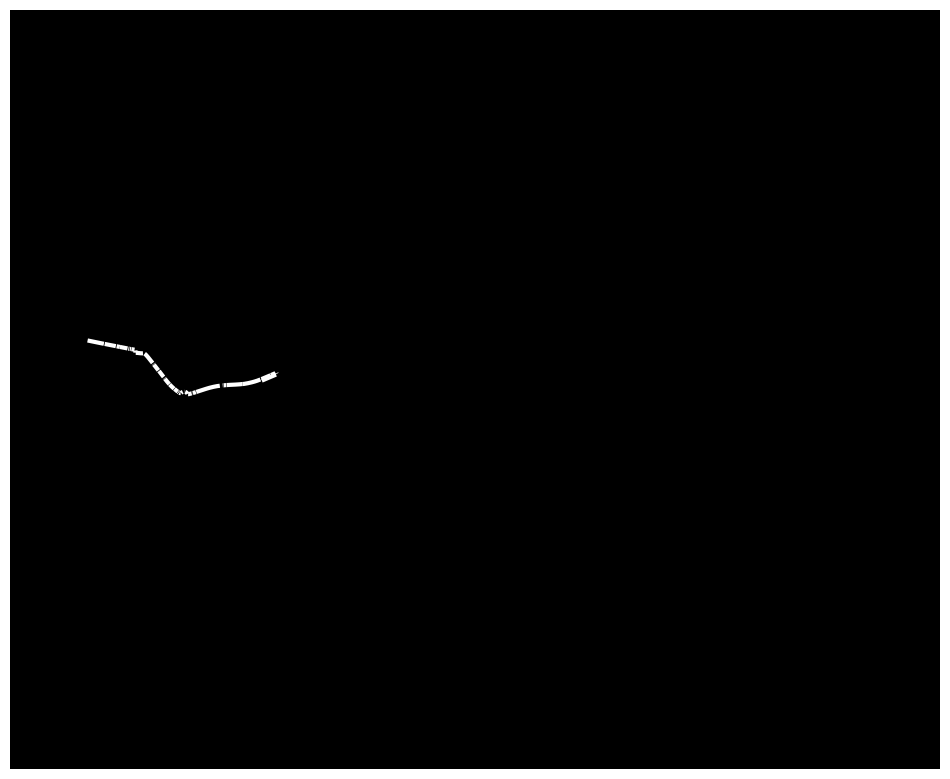

In [35]:
plot_the_route(net, routes[40], edge_list)